## Показатели оценки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

#### Предыдущий блок

In [3]:
total_charges = pd.to_numeric(df.TotalCharges, errors="coerce")

In [4]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors="coerce")
df.TotalCharges = df.TotalCharges.fillna(0)

In [5]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

string_columns = list(df.dtypes[df.dtypes == "object"].index)
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [6]:
df.churn = (df.churn == "yes").astype("int")

In [7]:
from sklearn.model_selection import train_test_split

df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

X_train = df_train.drop("churn", axis=1)
X_val = df_val.drop("churn", axis=1)

y_train = df_train.churn.values
y_val = df_val.churn.values

In [8]:
# Создадим два массива с котигориальными и числовыми признаками
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
    'phoneservice', 'multiplelines', 'internetservice',
    'onlinesecurity', 'onlinebackup', 'deviceprotection',
    'techsupport', 'streamingtv', 'streamingmovies',
    'contract', 'paperlessbilling', 'paymentmethod']

numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [9]:
train_dict = df_train[categorical + numerical].to_dict(orient="records")
train_dict[0]

{'gender': 'male',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'dsl',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'bank_transfer_(automatic)',
 'tenure': 71,
 'monthlycharges': 86.1,
 'totalcharges': 6045.9}

In [10]:
train_dict = df_train[categorical + numerical].to_dict(orient="records")
train_dict[0]

{'gender': 'male',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'dsl',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'bank_transfer_(automatic)',
 'tenure': 71,
 'monthlycharges': 86.1,
 'totalcharges': 6045.9}

In [11]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [12]:
X_train = dv.transform(train_dict)
X_train[0]

array([0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 8.6100e+01, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 7.1000e+01, 6.0459e+03])

In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver="liblinear", random_state=1)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,1
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [14]:
val_dict = df_val[categorical + numerical].to_dict(orient="records")
X_val = dv.transform(val_dict)
y_pred = model.predict_proba(X_val)[:, 1]

churn = y_pred >= 0.5
(y_val == churn).mean()

np.float64(0.8016129032258065)

### Достоверность классификации

Достоверность - самый простой способ оценить классификатор: посчитав уоличесвтво случаев, в которых наша модель оказалась права, мы можем многое узнать о ее поведении и качестве.

Несмотря на то что достоверность легко реализовать самостоятельно, мы можем использовать и существующие реализации. Библиотека sklearn предлагает множество показателей, включая достоверность и м.др., которые будем применять позже. 

Теперь мы можем перебрать различные пороговые значения и выяснить, какое из них дает наилучшую достоверность:

In [15]:
from sklearn.metrics import accuracy_score

thresholds = np.linspace(0, 1, 11)

for t in thresholds:
    churn = y_pred >= t
    score = accuracy_score(y_val, churn)
    print(f"{t:.2f}, {score:.3f}")

0.00, 0.261
0.10, 0.595
0.20, 0.690
0.30, 0.755
0.40, 0.782
0.50, 0.802
0.60, 0.790
0.70, 0.774
0.80, 0.742
0.90, 0.739
1.00, 0.739


Как мы видим, использование порога 0.5 дает наилучшую достоверность. Как правило, 0.5 - хорошее начальное пороговое значение, но мы всегда должны пробовать и другие, чтобы убедиться, что 0.5 - действительно лучший выбор.

thresholds = np.linspace(0, 1, 11)Для наглядности используем matplotlib для создания графика, который показывает, как изменяется достоверность в зависимости от порогового значения. 

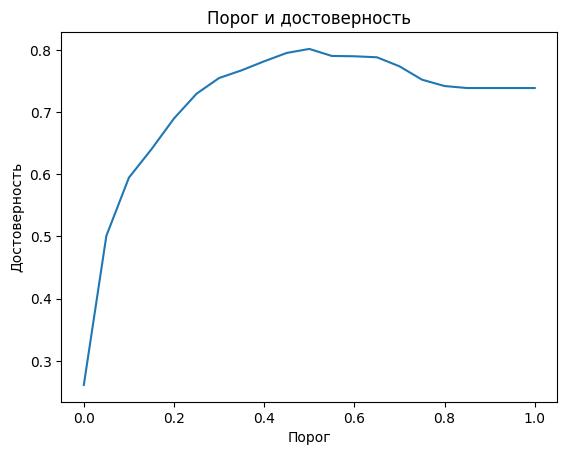

In [16]:
thresholds = np.linspace(0, 1, 21)
scores = []

for t in thresholds:
    churn = y_pred >= t
    score = accuracy_score(y_val, churn)
    scores.append(score)

plt.plot(thresholds, scores);
plt.title("Порог и достоверность");
plt.xlabel("Порог");
plt.ylabel("Достоверность");
plt.show();

### Фиктивная базовая линия

Данный показатель кажется хорошим, однако чтобы определить, действительно ли 80% - это хорошо, нам следует связать его с чем-то - например, с простой базовой линией, которую легко понять. Одной из таких базовых линий может стать фиктивная модель, которая всегда предсказывает одно и то же значение.

В нашем примере набор данных не сбалансирован, и у нас не так много ушедших пользователей. Таким образом, фиктивная модель всегда может прогнощировать класс большинства - "оттока нет". Другими словами, эта модель всегда будет выдавать False, независимо от признаков. Это не очень полезная модель, но ее можно использовать в качетсве базовой и сравнить с двумя другими.

Создадим этот базовый прогноз:

In [17]:
size_val = len(y_val)
baseline = np.repeat(False, size_val)

Теперь проверим достоверность этого базового прогноза с помощью кода, который использовали ранее:

In [18]:
accuracy_score(baseline, y_val)

0.7387096774193549

Получили 0.438. Это означает, что достоверность базовой модели составляет около 74%.

Как видим, малая модель лучше базовой всего на 2%, а большая - на 6%. Если вспомним все те трудности, которые нам пришлось преодолеть, чтобы обучить эту большую модель, то 6% могут показаться не таким уж и значительным приростом по сравнению с фиктивным базовым уровнем.

Прогонзирование оттока - сложная задача, и, возможно, это отличное улучшение. Однако это совсем не очевидно, если использовать только показатель достоверности. Согласно ему наша модель лишь немного лушче фиктивной, которая рассматривает всех клиентов как надежных и не пытается удержать никого из них.

Таким образом, нам нужны дополнительные показатели - другие сопосбы измерения качества нашей модели. Эти показатели основаны на матрице ошибок.

### Матрица ошибок

В случае, когда у нас дисбаланс классов, требуются другие способы измерения качества моделей. Для этого имеется несколько вариантов, и большинство из них основаны на матрице ошибок: таблице, которая в сжатой форме представляет все возможные результаты ля прогнозов нашей модели.

Когда мы делаем прогноз, он оказывается либо верным, либо нет:

- если мы прогнозируем "отток", то клиент может действительно уйти, а может и остаться;
- если мы прогнозируем "без оттока", то вполне вероятно, что клиент действительно не уйдет, но возможно и то, что в действительности он расторгнет договор.

Таким образом, мы получаем четыре возможных результата:

- мы предсказываем False, и ответ оказывается False; *истинно отрицательный (TN)*
- мы предсказываем False, и ответ оказываетя True;  *ложно отрицательный (FN)*
- мы предсказываем True, и ответ оказываетя False; *ложно положительный (FP)*
- мы предсказываем True, и ответ оказываетя True; *истинно положительный (TP)*

Две из этих ситуаций - первая и последняя - хорошие: прогноз соотвествует фактическому значению.

Чтобы представлять эти результаты более наглядно, полезно расположить их в таблице. Мы можем поместить предсказанные классы в столбцы, а фактические в строки.

<img src="ConfussionMatrix.png" width="40%" style="margin: 0 auto">

In [19]:
from sklearn.metrics import confusion_matrix

t = 0.5
churn = y_pred >= t
confusion_matrix(y_val, churn)

array([[1202,  172],
       [ 197,  289]])

In [20]:
confusion_matrix(y_val, churn) / confusion_matrix(y_val, churn).sum()

array([[0.64623656, 0.09247312],
       [0.10591398, 0.15537634]])

Обобщим результаты в таблице и видим, что модель хорошо прогнозирует отрицательные значения: 65% прогнозов - истинно отрицательные. Однако, она допускает довольно много ошибок обоих типов (9 и 11% соответсвенно).


Таблица дает нам лучшее представление о производительности модели - теперь легко разибть производительность на различные компоненты и понять, где модель допускает ошибки. На самом деле мы видим, что производительность модели не слишком велика: она допускает довольно много ошибок при попытке идентифицировать пользователей, которые планируют уйти. Это то, чего мы не смогли бы узнать, используя только показатель достоверности (accuracy).

#### Точность и отклик

Достоверность может ввести в заблуждение при работе с несбалансированными наборами данных. В подобных случаях полезно использовать другие показатели: точность и отклик.

**Точность** - сообщает нам, сколько положительных прогнозов оказались верными. Это доля правильно прогнозированных положительных примеров. (каков процент правильных прогнозов среди клиентов с прогнозом "отток")
$$ P = \frac{TP}{TP + FP} $$

**Отклик** - доля праивльно класссифцированных положительных примеров среди всех положительных примеров. (каков процент правильных прогнозов "оттока" среди всех клиентов "оттоком")
$$R = \frac{TP}{TP + FN}$$

<img src="Recall-Precision.png" style="margin: 0 auto; width: 70%;">

## Кривая ROC и оценка AUC

Кривая ROC - один из способов оценить производительность модели при всех возможных пороговых значениях.

ROC расшифровывается как "рабочие характеристики приемника" (receiver operating characteristic). Он показывает, насколько хорошо модель может разделять два класса, положительный и отрицательны. В нашем случае это "отток" и "без оттока".

Нам нужны две метрики для кривых ROC: TPR (true postitive rate, доля истинно положительных результатов) и FPR (false postitive rate, доля ложноположительных результатов). Познакомимся с ними поближе.

### FRP и TPR
- FPR - доля ложноположительных результатов среди всех отрицательных.
- TPR - доля истинно положительных результатов среди всех положительных.

Эти значения тоже основаны на матрице ошибок. Мы можем рассчитать их, используя следующие формулы:

$$ FPR = \frac{FP}{FP + TN} $$
$$ TPR = \frac{TP}{TP + FN} $$

<img src="FPR-TPR.jpg" width="50%" style="margin: 0 auto">

* Для **FPR** мы смотрии на первую строку таблицы: доля ложноположительных результатов среди всех отрицательных;

  - Это доля пользователей, для которой мы спрогнозировали отток, среди всех, кто не подвергся оттоку. Небольшое значение FPR говорит о том, что модель хороша - у нее оказалось мало ложных срабатываний.

* ДЛя **TPR** мы смотрим на вторую строку: доля истинно положительных среди всех положительных.

  - Это доля пользователей, для которых мы прогнозировали отток, среди всех, кто дествительно расторг договор. Чем она больше, тем лучше.
 
Однако мы по-прежнему рассматриваем показатели FPR и TPR только при одном пороговом значении, и в нашем слуае это 0.5. Что бы иметь возможность использовать их для кривых ROC, нам нужно рассчитать эти показатели для множества различных пороговых значений.

### Оценка модели при нескольких пороговых значениях.

Вместо того чтобы рценивать модель по одному конкретному порогу, мы можем сделать это для целого ряда. 

Для этого сначала перебираем различные пороговые значения и вычисляем значения матрицы ошибок для каждого из них.

In [21]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    tp = ((y_pred >= t) & (y_val == 1)).sum()
    fp = ((y_pred >= t) & (y_val == 0)).sum()
    fn = ((y_pred < t) & (y_val == 1)).sum()
    tn = ((y_pred < t) & (y_val == 0)).sum()
    scores.append((t, tp, fp, fn, tn))

In [22]:
df_scores = pd.DataFrame(scores)
df_scores.columns = ["threshold", "tp", "fp", "fn", "tn"]

In [23]:
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,486,1374,0,0
10,0.1,458,726,28,648
20,0.2,421,512,65,862
30,0.3,380,350,106,1024
40,0.4,337,257,149,1117
50,0.5,289,172,197,1202
60,0.6,200,105,286,1269
70,0.7,99,34,387,1340
80,0.8,7,1,479,1373
90,0.9,0,0,486,1374


Теперь мы можем вычислить показатели TPR и FPR. Поскольку данные теперь находятся в DataFrameб мы можем сделать это для всех значений сразу.

In [24]:
df_scores["tpr"] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores["fpr"] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [25]:
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,486,1374,0,0,1.000000,1.000000
10,0.1,458,726,28,648,0.942387,0.528384
20,0.2,421,512,65,862,0.866255,0.372635
30,0.3,380,350,106,1024,0.781893,0.254731
40,0.4,337,257,149,1117,0.693416,0.187045
50,0.5,289,172,197,1202,0.594650,0.125182
60,0.6,200,105,286,1269,0.411523,0.076419
70,0.7,99,34,387,1340,0.203704,0.024745
80,0.8,7,1,479,1373,0.014403,0.000728
90,0.9,0,0,486,1374,0.000000,0.000000


Построим график

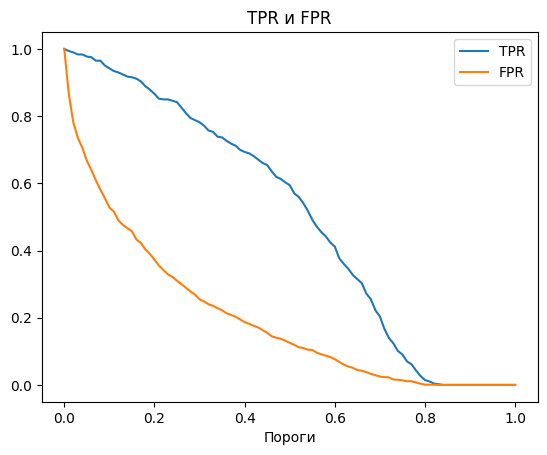

In [26]:
plt.plot(df_scores.threshold, df_scores.tpr, label="TPR");
plt.plot(df_scores.threshold, df_scores.fpr, label="FPR");
plt.title("TPR и FPR");
plt.xlabel("Пороги");
plt.legend();

По мере уволичения порога оба показателя снижаются, но с разной скоростью.

В идеале FPR должен снижаться очень быстро. Небольшой FPR указывает на то, что модель допускает очень мало ошибок, прогнозируя отрицательные примеры.

С другой стороны, TPR должен снижаться медленно, в идеале оставаясь все время около 100%: это будет означать, что модель хорошо прогнозирует истинно положительные результаты. 

Что бы лучше понять показатели TPR и FPR, сравним их с двумя базовыми моделями: случайной и идеальной. Начнем со случайной.

### Случайная базовая модель

Случайная модель выдает результат от 0 до 1, независемо от входных данных. Это легко реализовать - мы просто генерируем массив с однородными случайными числами:

In [28]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))

Расчитаем FPR и TPR для получившейся случайной модели. Чтобы упростить задачу, мы повторно используем код, который написали ранее, и поместим его в функцию.

In [29]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)
    
    for t in thresholds:
        tp = ((y_pred >= t) & (y_val == 1)).sum()
        fp = ((y_pred >= t) & (y_val == 0)).sum()
        fn = ((y_pred < t) & (y_val == 1)).sum()
        tn = ((y_pred < t) & (y_val == 0)).sum()
        scores.append((t, tp, fp, fn, tn))

    df_scores = pd.DataFrame(scores)
    df_scores.columns = ["threshold", "tp", "fp", "fn", "tn"]

    df_scores["tpr"] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores["fpr"] = df_scores.fp / (df_scores.fp + df_scores.tn)

    return df_scores

In [31]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,486,1374,0,0,1.000000,1.000000
10,0.1,440,1236,46,138,0.905350,0.899563
20,0.2,392,1101,94,273,0.806584,0.801310
30,0.3,339,972,147,402,0.697531,0.707424
40,0.4,288,849,198,525,0.592593,0.617904
50,0.5,239,723,247,651,0.491770,0.526201
60,0.6,193,579,293,795,0.397119,0.421397
70,0.7,152,422,334,952,0.312757,0.307132
80,0.8,98,302,388,1072,0.201646,0.219796
90,0.9,57,147,429,1227,0.117284,0.106987


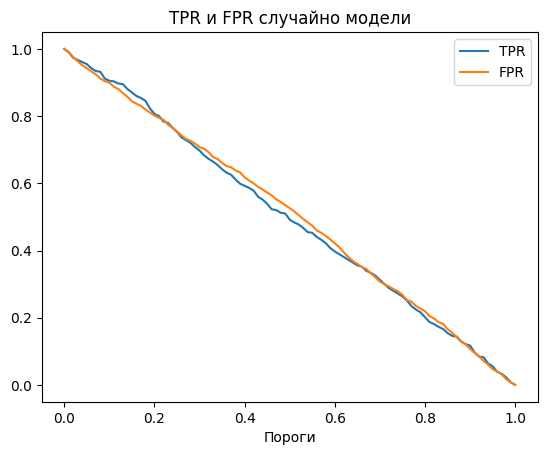

In [36]:
plt.plot(df_rand.threshold, df_rand.tpr, label="TPR");
plt.plot(df_rand.threshold, df_rand.fpr, label="FPR");
plt.title("TPR и FPR случайно модели");
plt.xlabel("Пороги");
plt.legend();

Теперь передйем к следующей базовой линии и псомотрим, как TPR и FPR выглядят для идеальной модели.


### Идеальная модель

Идеальная модель всегда принимает правильные решения. Эта модель выводит оценки таким образом, что клиенты с "оттоком" всегда имеют более высокие баллы "без оттока". Другими словами, прогнозируемая вероятность для всех клиентов с "оттоком" должна быть выше, чем прогнозируемая вероятность для клиентов "без оттока".

Итак, если применим модель ко всем клиентам в проверочном наборе, а затем отсортируем их по прогноизруемой вероятности, то в начале у нас расположатся все клиенты "без оттока", а затем клиенты, у которых "отток" есть.

<img src="ideal_model.png" style="margin: 0 auto">

In [35]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()

y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_pred_ideal = np.linspace(0, 1, num_neg + num_pos)

df_ideal = tpr_fpr_dataframe(y_ideal, y_pred_ideal)
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,486,1374,0,0,1.000000,1.000000
10,0.1,486,1188,0,186,1.000000,0.864629
20,0.2,486,1002,0,372,1.000000,0.729258
30,0.3,486,816,0,558,1.000000,0.593886
40,0.4,486,630,0,744,1.000000,0.458515
50,0.5,486,444,0,930,1.000000,0.323144
60,0.6,486,258,0,1116,1.000000,0.187773
70,0.7,486,72,0,1302,1.000000,0.052402
80,0.8,372,0,114,1374,0.765432,0.000000
90,0.9,186,0,300,1374,0.382716,0.000000


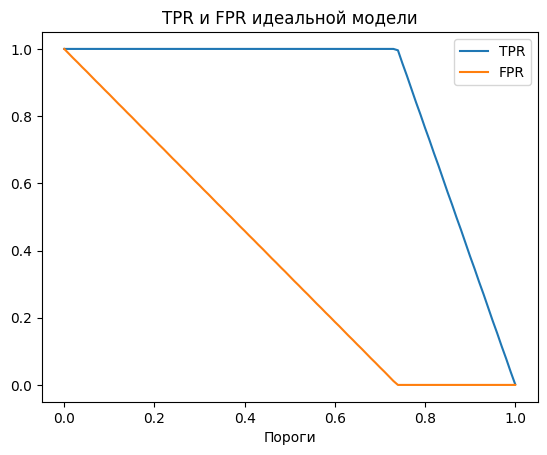

In [39]:
plt.plot(df_ideal.threshold, df_ideal.tpr, label="TPR");
plt.plot(df_ideal.threshold, df_ideal.fpr, label="FPR");
plt.title("TPR и FPR идеальной модели");
plt.xlabel("Пороги");
plt.legend();